## Regressão

O objetivo deste exercício é introduzir e praticar conceitos de Regressão. Para isso utilizaremos 2 bases: <i>Advertising.csv</i> e <i>Portland_housePrices.csv</i>

In [38]:
import pandas as pd

dados_adv = pd.read_csv('data/Advertising.csv', index_col=0)
dados_adv = dados_adv.sample(frac=1)
dados_adv.head()

,TV,radio,newspaper,sales
56,198.9,49.4,60.0,23.7
165,117.2,14.7,5.4,11.9
97,197.6,3.5,5.9,11.7
107,25.0,11.0,29.7,7.2
188,191.1,28.7,18.2,17.3


<i>Advertising</i> é um conjunto de dados relacionando o montante de vendas (<i>sales</i>) com o montante investido em marketing em diferentes médias (<i>TV</i>,<i>radio</i> e <i>newspaper</i>).

Por sua vez, <i>Portland_housePrices</i> relaciona o preço de casas com seu tamanho e número de quartos.



In [39]:
dados_por = pd.read_csv('data/Portland_housePrices.csv', index_col=None)
dados_por = dados_por.sample(frac=1)
dados_por.head()

,tamanho,quartos,preco
13,4478,5,699900
31,1000,1,169900
16,1320,2,299900
1,1600,3,329900
43,1200,3,299000


## Como treinar e usar modelos?
Para virtualmente qualquer tipo de algoritmo de Regressão, existirá uma função <i>fit</i> para treinar o modelo.

Por exemplo, para a regressão linear:

```python
 reg = LinearRegression().fit(X,y)
``` 

Onde <i> X </i> se refere aos atributos de treinamento e <i>y</i> à variável resposta.


In [40]:
from sklearn.linear_model import LinearRegression
#Treina modelo utilizando dados de tamanho para prever preco
X = dados_por.loc[:,['tamanho']]
y = dados_por.loc[:,['preco']]

reg = LinearRegression().fit(X,y)
reg

LinearRegression()

Após treinado, o modelo pode ser utilizado para fazer predições (prever <i>y</i> para novos exemplos), através da função <i>predict</i>

In [41]:
y_hat = reg.predict(X[0:4])
y_hat

array([[673674.73085997],
       [205795.78016897],
       [248843.87223945],
       [286510.95280112]])

## Regressão Linear Univariada

O framework disponibiliza uma classe <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">LinearRegression</a> que implementa regressão linear com o método de mínimos quadrados:

```python
linear_model = LinearRegression()
linear_model.fit(X,y)
linear_model.predict(X)

```
## Avaliando Modelos

Existem algumas formas de inspecionar ou avaliar o modelo aprendido. A primeira forma é visualizar o modelo em um gráfico.



Text(0, 0.5, 'Preço')

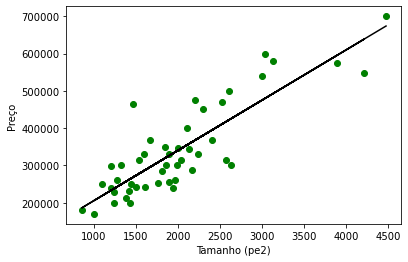

In [42]:
from matplotlib import pyplot as plt

plt.scatter(X, y,color='g')
plt.plot(X, reg.predict(X),color='k')
plt.xlabel('Tamanho (pe2)')
plt.ylabel('Preço')

Quando há mais de um atributo preditor, visualizar o modelo torna-se difícil, mas ainda é possível avaliar o modelo através do <b>erro quadrático (RSS)</b> ou a métrica <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html"><b>R^2</b></a>

In [43]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

def calc_rss(y,predicted):
    return float(((predicted - y) ** 2).sum())
    
def calc_r2(y,predicted):
    return r2_score(predicted,y)

def calc_mse(y, predicted):
    return mean_squared_error(predicted, y, squared=False)

In [44]:
rss = calc_rss(y,reg.predict(X))
r2 = calc_r2(y,reg.predict(X))
mse1 = calc_mse(y,reg.predict(X))
print(rss)
print(r2)
print(mse1)

193464477600.70587
0.632018025185115
64158.12872010905


# Exercício 1
Treine modelos lineares na base <i>Portland_housePrices.csv</i> utilizando apenas um dos atributos preditores.

1) Observando visualmente o modelo, qual atributo parece mais razoável? o que foi aprendido com <i>tamanho</i> ou com <i>número de quartos</i>?

2) O RSS e R^2 corroboram suas impressões observando o modelo?




In [45]:
#Treina modelo utilizando dados de tamanho para prever preco
#tamanhos, quartos, preço
x2 = dados_por.loc[:,['quartos']]
y2 = dados_por.loc[:,['preco']]

reg2 = LinearRegression().fit(x2,y2)
reg2

y_hat2 = reg2.predict(x2[0:4])
y_hat2

array([[473382.65335463],
       [182704.06230032],
       [255373.7100639 ],
       [328043.35782748]])

Text(0, 0.5, 'Preço')

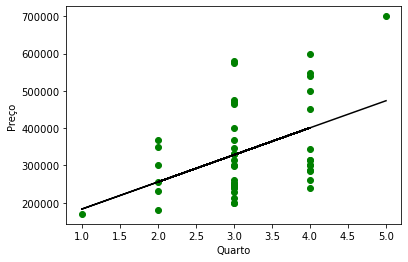

In [46]:
plt.scatter(x2, y2,color='g')
plt.plot(x2, reg2.predict(x2),color='k')
plt.xlabel('Quarto')
plt.ylabel('Preço')

In [47]:
rss2 = calc_rss(y2,reg2.predict(x2))
r22 = calc_r2(y2,reg2.predict(x2))
mse2 = calc_mse(y2,reg.predict(x2))
print(rss2)
print(r22)
print(mse2)

578535325112.5248
-3.1126078554319987
295802.92441860365


R1: Observando visualmente é perceptível que a função está seguindo o crescimento linear do valor dos preços, permitindo uma predição melhor.
R2: O mse/rss permite uma visualição melhor da linearidade, já em termos do r2 mostrou que o nº de quartos não representa proporcionalmente a predição.

# Exercício 2

Treine modelos lineares na base <i>Advertising.csv</i> utilizando apenas um dos atributos preditores.

1) Observando visualmente o modelo, qual atributo parece mais razoável? o que foi aprendido com TV, radio ou newspaper?

2) Qual dos modelos é melhor? como você chegou a esta conclusão?

In [48]:
#TV, radio,newspaper, sales
x3 = dados_adv.loc[:,['TV']]
y3 = dados_adv.loc[:,['sales']]

reg3 = LinearRegression().fit(x3, y3)
reg3

y_hat3 = reg3.predict(x3[0:4])
y_hat3

array([[16.48763133],
       [12.60388781],
       [16.4258337 ],
       [ 8.22100956]])

Text(0, 0.5, 'Sales')

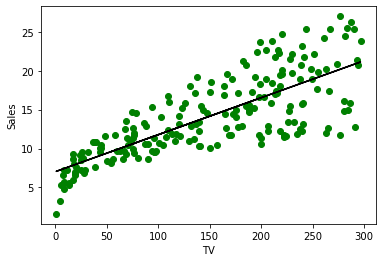

In [49]:
plt.scatter(x3, y3,color='g')
plt.plot(x3, reg3.predict(x3),color='k')
plt.xlabel('TV')
plt.ylabel('Sales')

In [50]:
rss3 = calc_rss(y3,reg3.predict(x3))
r23 = calc_r2(y3,reg3.predict(x3))
mse3 = calc_mse(y3,reg3.predict(x3))
print(rss3)
print(r23)
print(mse3)

2102.5305831313517
0.3656794003764141
3.2423221486546887


In [51]:
#TV, radio, newspaper, sales
x4 = dados_adv.loc[:,['radio']]
y4 = dados_adv.loc[:,['sales']]

reg4 = LinearRegression().fit(x4, y4)
reg4

y_hat4 = reg4.predict(x4[0:4])
y_hat4

array([[19.31492979],
       [12.28832611],
       [10.02037334],
       [11.53909171]])

Text(0, 0.5, 'Sales')

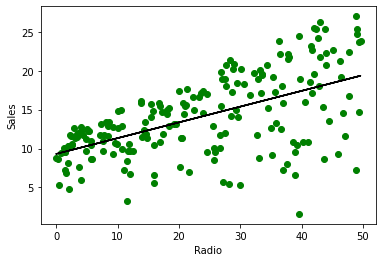

In [52]:
plt.scatter(x4, y4,color='g')
plt.plot(x4, reg4.predict(x4),color='k')
plt.xlabel('Radio')
plt.ylabel('Sales')

In [53]:
rss4 = calc_rss(y4,reg4.predict(x4))
r24 = calc_r2(y4,reg4.predict(x4))
mse4 = calc_mse(y4,reg4.predict(x4))
print(rss4)
print(r24)
print(mse4)

3618.479549025088
-1.011753771657292
4.2535159274564185


In [54]:
#TV, radio, newspaper, sales
x5 = dados_adv.loc[:,['newspaper']]
y5 = dados_adv.loc[:,['sales']]

reg5 = LinearRegression().fit(x5, y5)
reg5

y_hat5 = reg5.predict(x5[0:4])
y_hat5

array([[15.63299298],
       [12.6467498 ],
       [12.67409635],
       [13.97579209]])

Text(0, 0.5, 'Sales')

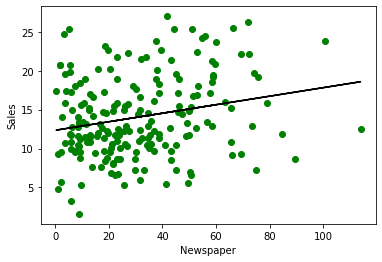

In [55]:
plt.scatter(x5, y5,color='g')
plt.plot(x5, reg5.predict(x5),color='k')
plt.xlabel('Newspaper')
plt.ylabel('Sales')

In [56]:
rss5 = calc_rss(y5,reg5.predict(x5))
r25 = calc_r2(y5,reg5.predict(x5))
mse5 = calc_mse(y5,reg5.predict(x5))
print(rss5)
print(r25)
print(mse5)

5134.804544111939
-17.186328732907334
5.066953988399707


R1: A variável tv resultou em uma regressão mais fiel.
R2: O valor do r2 está mais próximo de 1. E o valor do mse foi o menor.

# Exercício 3

1. Compare os resultados das duas regressões com a implementação do KNN-Regressor visto na aula passada.

1. Utilizando a API do scikit-learn para criação de partições de treino e teste, refaça a sua regressão nas partições de treino e faça a validação nas partições de teste.

    1. Comparar os resultados na partição de treino e teste;
    1. Comparar desempenho com a regressão na qual não foi feita a separação entre treino e teste. Você acha que o desempenho deveria ser melhor ou pior nesse caso? É possível dizer que os modelos treinados no dataset completo generalizam?


In [114]:
from sklearn.neighbors import KNeighborsRegressor

x6 = dados_por.loc[:,['tamanho', 'quartos']]
y6 = dados_por.loc[:,['preco']]

knn = KNeighborsRegressor(n_neighbors=3)

# split = 0.3
# div1 = int(split * len(x6))
# xtrain = x6[:div1]
# xtest = x6[div1:]

# div2 = int(split * len(y6))
# ytrain = y6[:div2]
# ytest = y6[div2:]

# knn.fit(xtrain,ytrain)
knn.fit(x6,y6)

KNeighborsRegressor(n_neighbors=3)

In [115]:
# y_hat6 = knn.predict(xtest[0:4])

y_hat6 = knn.predict(x6[0:4])
y_hat6

array([[607600.        ],
       [199900.        ],
       [257266.66666667],
       [313766.66666667]])

In [116]:
# rss6 = calc_rss(ytest, knn.predict(xtest))
# r26 = calc_r2(ytest, knn.predict(xtest))
# mse6 = calc_mse(ytest, knn.predict(xtest))

rss6 = calc_rss(y6, knn.predict(x6))
r26 = calc_r2(y6, knn.predict(x6))
mse6 = calc_mse(y6, knn.predict(x6))

print(rss6)
print(r26)
print(mse6)

154464153316.22226
0.7396984559304259
57327.75372499489


In [96]:
x7 = dados_adv.loc[:,['TV', 'radio', 'newspaper']]
y7 = dados_adv.loc[:,['sales']]

knn2 = KNeighborsRegressor(n_neighbors=3)

split = 0.3
div3 = int(split * len(x7))
xtrain2 = x7[:div1]
xtest2 = x7[div1:]

div4 = int(split * len(y7))
ytrain2 = y7[:div2]
ytest2 = y7[div2:]

knn2.fit(xtest2,ytest2)

KNeighborsRegressor(n_neighbors=3)

In [100]:
y_hat7 = knn2.predict(xtest2[0:4])
y_hat7

array([[13.3       ],
       [15.2       ],
       [19.93333333],
       [ 8.76666667]])

In [101]:
rss7 = calc_rss(ytest2,knn2.predict(xtest2))
r27 = calc_r2(ytest2,knn2.predict(xtest2))
mse7 = calc_mse(ytest2,knn2.predict(xtest2))
print(rss7)
print(r27)
print(mse7)

170.45555555555558
0.9626559240183575
0.9573023127730452


R: O resultado melhor foi obtido no algoritmo de knn no exemplo de vendas por. Foi feito a análise com o treinamento do datasetcompleto, e "favorece" o resultado.